# Visualização de Dados com Gráficos de 3 Dimensões

### Minimizar $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

### Minimizar $$f(x, y) = \frac{1}{r + 1}$$ onde $r$ é $3^{-x^2 - y^2}$

In [62]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # colormap
from sympy import symbols, diff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [10]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [11]:
# Criando nossos dados 'x' e 'y'
x = np.linspace(start=-2, stop=2, num=200)
y = np.linspace(start=-2, stop=2, num=200)

print(f'Forma do array x é: {x.shape}')
print(f'Forma do array y é: {y.shape}')

x, y = np.meshgrid(x, y)
print(f'Forma do array x depois de transformado: {x.shape}')
print(f'Forma do array y depois de transformado: {y.shape}')

Forma do array x é: (200,)
Forma do array y é: (200,)
Forma do array x depois de transformado: (200, 200)
Forma do array y depois de transformado: (200, 200)


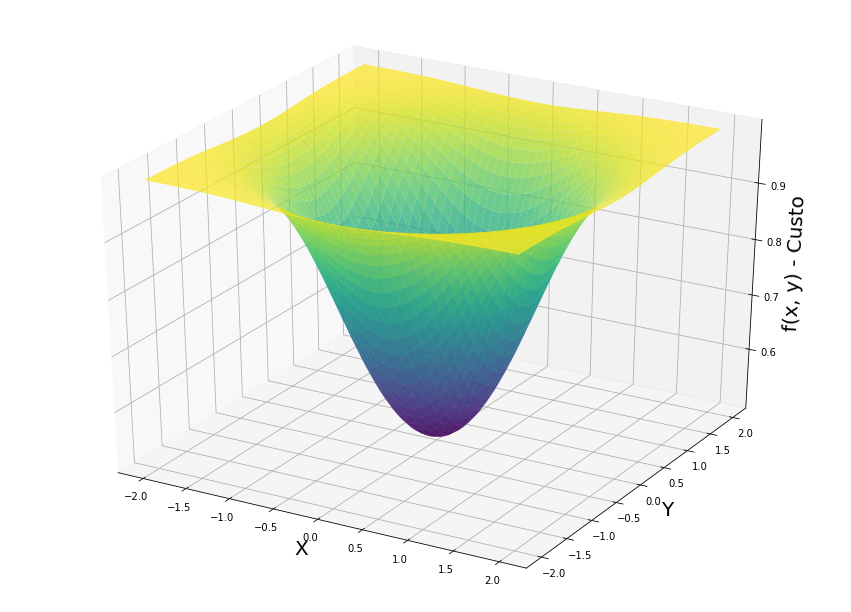

In [12]:
# Gerando um gráfico 3D
fig = plt.figure(figsize=[15, 11])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Custo', fontsize=20)
ax.plot_surface(x, y, f(x, y), cmap=cm.viridis, alpha=0.77)

### Derivadas Parciais e Computação Simbólica

### $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right)^2}$$

### $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right)^2}$$

In [13]:
f(a, b)

1/(3**(-x**2 - y**2) + 1)

In [14]:
a, b = symbols('x, y')
print(f'Nossa função de custo f(x,y) é : {f(a, b)}')

Nossa função de custo f(x,y) é : 1/(3**(-x**2 - y**2) + 1)


In [15]:
diff(f(a,b), a)

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [16]:
print(f'A derivada parcial é {diff(f(a,b), a)}')

A derivada parcial é 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


### Avaliando os valores da função 

In [17]:
f(a, b).evalf(subs={a:1.8, b:1.0})

0.990604794032582

In [18]:
f(a, b).evalf(subs={a:0, b:0})

0.500000000000000

In [19]:
f(a, b).evalf(subs={a:0.3, b:0.5})

0.592311234766793

### Avaliando os valores da derivada 

In [20]:
diff(f(a, b), a).evalf(subs={a:0.4, b:1.0})

0.150080535172214

In [21]:
diff(f(a, b), a).evalf(subs={a:1.8, b:1.0})

0.0368089716197505

### Batch Gradient Descent com SymPy

In [22]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Palpite inicial

In [23]:
for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Resultados
print(f'Valores no array do Gradient: {gradients}')
print(f'Minimum ocorre no valor x em: {params[0]}')
print(f'Minimum ocorre no valor y em: {params[1]}')
print(f'O custo é {f(params[0], params[1])}')

Valores no array do Gradient: [2.01013037525579e-11 1.11673909736433e-11]
Minimum ocorre no valor x em: 3.45838599885832E-11
Minimum ocorre no valor y em: 1.92132555492129E-11
O custo é 0.500000000000000


In [24]:
# Funções derivadas parciais
from math import log

def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [25]:
fpx(1.8, 1.0)

0.036808971619750504

In [26]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Palpite inicial

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Resultados
print(f'Valores no array do Gradient: {gradients}')
print(f'Minimum ocorre no valor x em: {params[0]}')
print(f'Minimum ocorre no valor y em: {params[1]}')
print(f'O custo é {f(params[0], params[1])}')

Valores no array do Gradient: [2.01013038e-11 1.11673910e-11]
Minimum ocorre no valor x em: 3.458385998858304e-11
Minimum ocorre no valor y em: 1.9213255549212797e-11
O custo é 0.5


### Projetando o Gradient Descent 3D

In [27]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Palpite inicial

values_array = params.reshape(1, 2)
print(values_array)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Resultados
print(f'Valores no array do Gradient: {gradients}')
print(f'Minimum ocorre no valor x em: {params[0]}')
print(f'Minimum ocorre no valor y em: {params[1]}')
print(f'O custo é {f(params[0], params[1])}')

[[1.8 1. ]]
(1, 2)
Valores no array do Gradient: [2.01013038e-11 1.11673910e-11]
Minimum ocorre no valor x em: 3.458385998858304e-11
Minimum ocorre no valor y em: 1.9213255549212797e-11
O custo é 0.5


In [28]:
# Práticas avançadas com arrays NumPy
k = np.array([['Blaise Pascal', 'Friedrich Gauss']])
print(k.shape)

(1, 2)


In [29]:
t = np.array([['Alan Turing', 'John Von Neumann'], ['Albert Einstein', 'Niels Bohr']])
print(t.shape)

(2, 2)


In [30]:
k[0]

array(['Blaise Pascal', 'Friedrich Gauss'], dtype='<U15')

In [31]:
k[0][0]

'Blaise Pascal'

In [32]:
k[0][1]

'Friedrich Gauss'

In [33]:
root = np.append(arr=t, values=k, axis=0)
print(root)
root = np.append(arr=root, values=[['Euclid', 'Archimedes']], axis=0)

[['Alan Turing' 'John Von Neumann']
 ['Albert Einstein' 'Niels Bohr']
 ['Blaise Pascal' 'Friedrich Gauss']]


In [34]:
print(f'Primeira coluna: {root[:, 0]}')

Primeira coluna: ['Alan Turing' 'Albert Einstein' 'Blaise Pascal' 'Euclid']


In [35]:
print(f'Segunda coluna: {root[:, 1]}')

Segunda coluna: ['John Von Neumann' 'Niels Bohr' 'Friedrich Gauss' 'Archimedes']


In [36]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Palpite inicial

values_array = params.reshape(1, 2)
print(values_array)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    # values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)

# Resultados
print(f'Valores no array do Gradient: {gradients}')
print(f'Minimum ocorre no valor x em: {params[0]}')
print(f'Minimum ocorre no valor y em: {params[1]}')
print(f'O custo é {f(params[0], params[1])}')

[[1.8 1. ]]
(1, 2)
Valores no array do Gradient: [2.01013038e-11 1.11673910e-11]
Minimum ocorre no valor x em: 3.458385998858304e-11
Minimum ocorre no valor y em: 1.9213255549212797e-11
O custo é 0.5


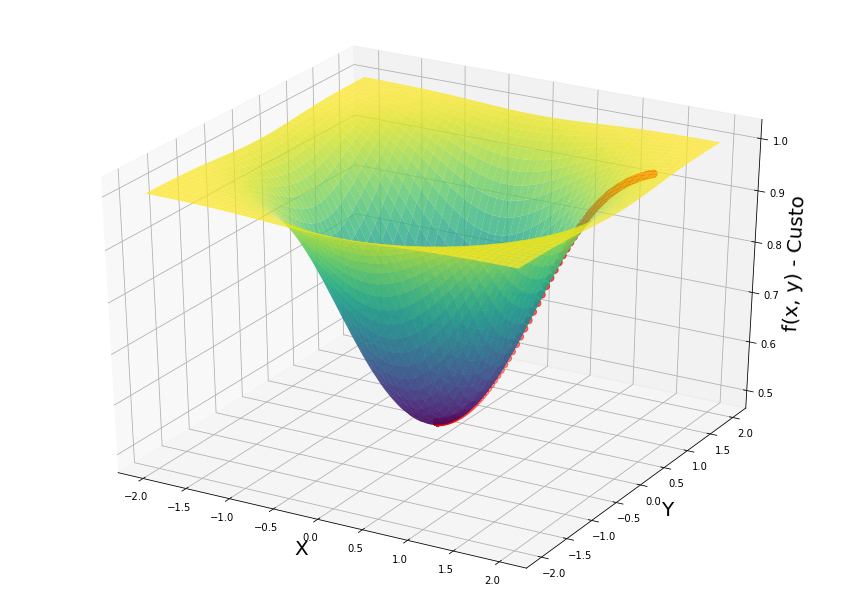

In [37]:
# Gerando um gráfico 3D
fig = plt.figure(figsize=[15, 11])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Custo', fontsize=20)
ax.plot_surface(x, y, f(x, y), cmap=cm.viridis, alpha=0.77)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='r')

### Trabalhando com Dados e Função de Custo Real

#### **Mean Squared Error:** Função de Custo para problemas de Regressão

#### $$ RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

#### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

#### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [38]:
# Gerando dados
x1 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y1 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print(f'Shape of x1: {x1.shape}')
print(f'Shape of y1: {y1.shape}')

Shape of x1: (7, 1)
Shape of y1: (7, 1)


In [39]:
# Regressão Linear
regr = LinearRegression()
regr.fit(x1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print(f'Theta 0 (Interceptação): {regr.intercept_[0]}')
print(f'Theta 1 (Inclinação): {regr.coef_[0][0]}')

Theta 0 (Interceptação): 0.8475351486029545
Theta 1 (Inclinação): 1.2227264637835913


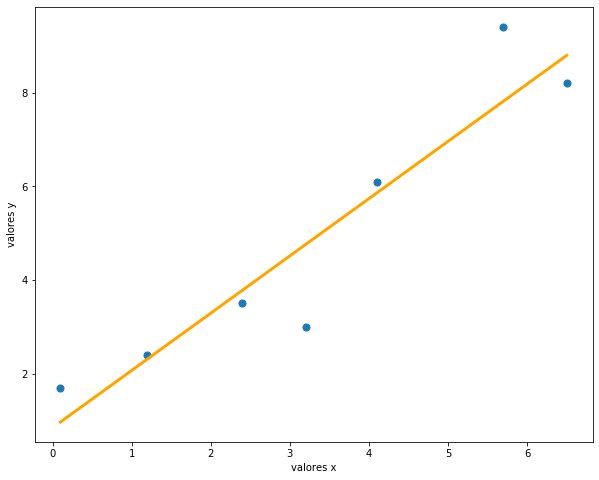

In [41]:
plt.figure(figsize=[10, 8])
plt.xlabel('valores x')
plt.ylabel('valores y')
plt.scatter(x1, y1, s=50)
plt.plot(x1, regr.predict(x1), color='orange', linewidth=3)

In [51]:
# y_hat = theta0 + theta1 * x
y_hat = 0.8475351486029545 + 1.2227264637835913 * x1
y_hat2 = regr.predict(x1)
print(f'Valores estimados y_hat são: \n {y_hat}')
print(f'Valores estimados y_hat são: \n {y_hat2}')

Valores estimados y_hat são: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Valores estimados y_hat são: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


In [48]:
print(f'Em comparação, os verdadeiros valores são: \n {y1}')

Em comparação, os verdadeiros valores são: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [60]:
# Função MSE
def mse(y, y_hat):
    # mse_calc = 1/7 * sum((y - y_hat)**2)
    # mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [64]:
mse(y1, y_hat)[0]

0.9479655759794577

In [63]:
# MSE calculado através do Scikit-Learn
mean_squared_error(y1, y_hat)

0.9479655759794577

In [65]:
mean_squared_error(y1, regr.predict(x1))

0.9479655759794577

### Gráfico 3D para a Função de Custo MSE

#### Gerando Dados para Thetas

In [87]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

In [88]:
th_0.shape

(200,)

In [89]:
plot_t0.shape

(200, 200)

### Cálculo do MSE utilizando For Loops Aninhados

In [90]:
plot_cost = np.zeros((nr_thetas, nr_thetas))
plot_cost

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
for i in range(3):
    for j in range(3):
        print(f'Valor de i é {i}, Valor de j é {j}')

Valor de i é 0, Valor de j é 0
Valor de i é 0, Valor de j é 1
Valor de i é 0, Valor de j é 2
Valor de i é 1, Valor de j é 0
Valor de i é 1, Valor de j é 1
Valor de i é 1, Valor de j é 2
Valor de i é 2, Valor de j é 0
Valor de i é 2, Valor de j é 1
Valor de i é 2, Valor de j é 2


In [92]:
for i in range(nr_thetas):
    for j in range(nr_thetas):
        # print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x1
        plot_cost[i][j] = mse(y1, y_hat)

print(f'Dimensão de plot_t0: {plot_t0.shape}')
print(f'Dimensão de plot_t1: {plot_t1.shape}')
print(f'Dimensão de plot_cost: {plot_cost.shape}')

Dimensão de plot_t0: (200, 200)
Dimensão de plot_t1: (200, 200)
Dimensão de plot_cost: (200, 200)


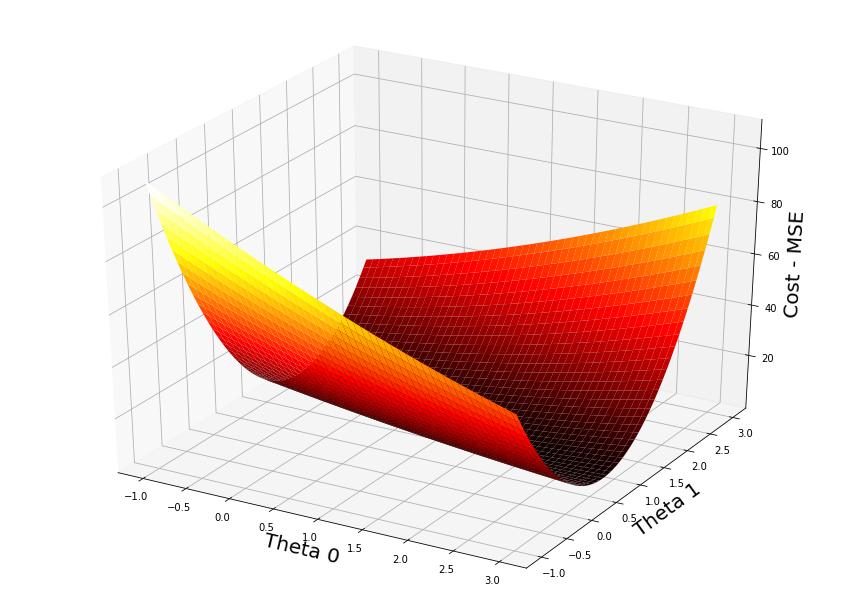

In [94]:
# Projetando o gráfico do MSE
fig = plt.figure(figsize=[15, 11])
ax = fig.gca(projection='3d')
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)

In [100]:
print(f'Menor valor de plot_cost {plot_cost.min()}')
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print(f'Minimo ocorre em (i,j): {ij_min}')
print(f'Min MSE para Theta 0 em plot_t0[111][91]: {plot_t0[111][91]}')
print(f'Min MSE para Theta 1 em plot_t0[111][91]: {plot_t1[111][91]}')

Menor valor de plot_cost 0.9483826526747164
Minimo ocorre em (i,j): (111, 91)
Min MSE para Theta 0 em plot_t0[111][91]: 0.829145728643216
Min MSE para Theta 1 em plot_t0[111][91]: 1.2311557788944723


### Derivadas Parciais do MSE $\theta_0$ e $\theta_1$

## $$ \frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $$

## $$ \frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big) $$

### MSE e Gradient Descent

In [101]:
# valores x, valores y, array de parâmetros theta (theta0 no índice 0 e theta1 no índice 1)
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1] * x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1] * x)* x)
    # return np.array([theta0_slope[0], theta1_slope[0]])
    # return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [104]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Coletar pontos de dados para o scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y1, thetas[0] + thetas[1] * x1)

for i in range(1000):
    thetas = thetas - multiplier * grad(x1, y1, thetas)
    # Anexar os novos valores para nosso array numpy
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y1, thetas[0] + thetas[1] * x1))

print(f'O mínimo ocorre em Theta 0: {thetas[0]}')
print(f'O mínimo ocorre em Theta 1: {thetas[1]}')
print(f'MSE é: {mse(y1, thetas[0] + thetas[1] * x1)}')

O mínimo ocorre em Theta 0: 0.8532230461743415
O mínimo ocorre em Theta 1: 1.2214935332607393
MSE é: [0.94797511]


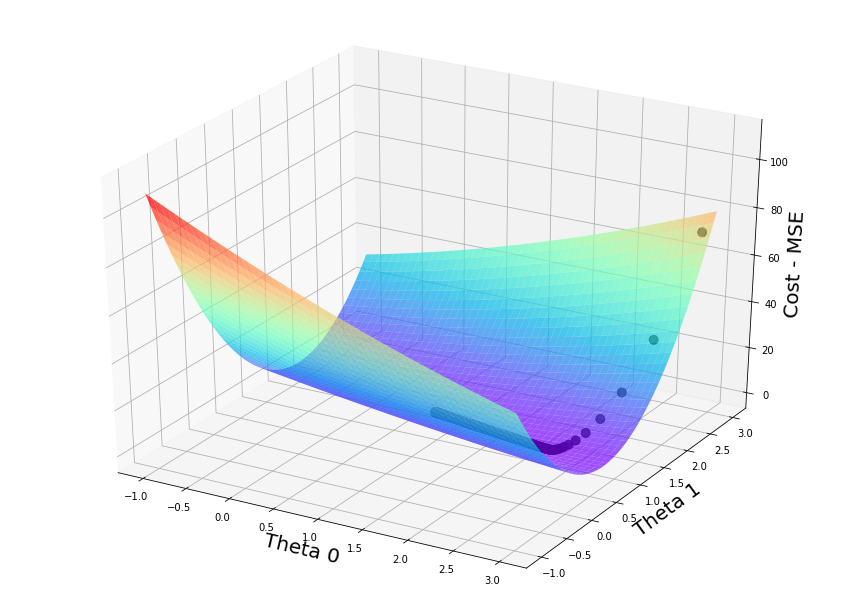

In [114]:
# Projetando o gráfico do MSE
fig = plt.figure(figsize=[15, 11])
ax = fig.gca(projection='3d')
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='k')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.7)